In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
/opt/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
diamonds_vol = pd.read_csv('../data/diamonds_vol.csv')
#diamonds_vol = diamonds_vol.set_index('Unnamed: 0','id')
#diamonds_predict = pd.read_csv('../data/diamonds_predict.csv')
diamonds_vol.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,volume
0,0,1.21,Premium,J,VS2,62.4,58.0,4268,0.344729
1,1,0.32,Very Good,H,VS2,63.0,57.0,505,0.091168
2,2,0.71,Fair,G,VS1,65.5,55.0,2686,0.202279
3,3,0.41,Good,D,SI1,63.8,56.0,738,0.116809
4,4,1.02,Ideal,G,SI1,60.5,59.0,4882,0.290598


In [3]:
#diamonds_vol = diamonds_vol[['cut', 'color', 'depth', 'clarity', 'table', 'price', 'volume']]
#diamonds_vol.head()

In [4]:
y = diamonds_vol.price

In [5]:
x = diamonds_vol.drop(['price'], axis=1)

,Unnamed: 0,carat,depth,table,volume
Unnamed: 0,1.000000,-0.001376,0.001321,0.002789,-0.001376
carat,-0.001376,1.000000,0.026528,0.183392,1.000000
depth,0.001321,0.026528,1.000000,-0.293114,0.026528
table,0.002789,0.183392,-0.293114,1.000000,0.183392
volume,-0.001376,1.000000,0.026528,0.183392,1.000000


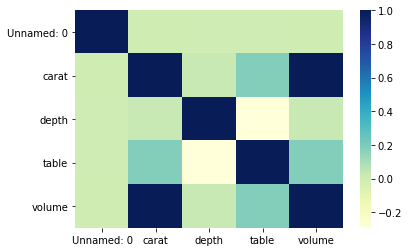

In [6]:
corr = x.corr()
display(x.corr())
plt.figure()
sns.heatmap(corr, cmap='YlGnBu')

In [7]:
print(x.isnull().sum())

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
volume        0
dtype: int64


In [8]:
x = pd.get_dummies(x)

In [9]:
display(x.corr())

,Unnamed: 0,carat,depth,table,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
Unnamed: 0,1.000000,-0.001376,0.001321,0.002789,-0.001376,0.011464,0.000336,-0.000935,-0.001446,-0.002318,...,-0.002400,0.003378,-0.000745,-0.000111,-0.002352,0.000720,0.007547,-0.004077,0.000525,-0.000938
carat,-0.001376,1.000000,0.026528,0.183392,1.000000,0.092438,0.031092,-0.167509,0.120642,0.011722,...,0.160282,0.183283,0.125381,-0.115349,0.063355,0.271281,-0.067258,-0.040117,-0.165871,-0.139410
depth,0.001321,0.026528,1.000000,-0.293114,0.026528,0.282748,0.144322,-0.028362,-0.200219,0.027065,...,0.027973,0.025880,0.087288,-0.031049,0.042043,0.008609,-0.021677,-0.011976,-0.027654,-0.021127
table,0.002789,0.183392,-0.293114,1.000000,0.183392,0.124266,0.170398,-0.546912,0.336919,0.122945,...,0.017346,0.036459,0.042091,-0.078284,0.051065,0.094244,-0.030222,-0.010142,-0.062731,-0.059755
volume,-0.001376,1.000000,0.026528,0.183392,1.000000,0.092438,0.031092,-0.167509,0.120642,0.011722,...,0.160282,0.183283,0.125381,-0.115349,0.063355,0.271281,-0.067258,-0.040117,-0.165871,-0.139410
cut_Fair,0.011464,0.092438,0.282748,0.124266,0.092438,1.000000,-0.055569,-0.144077,-0.102659,-0.094843,...,0.009520,0.017212,0.179198,-0.026746,0.006335,0.056677,-0.024516,-0.030396,-0.038622,-0.030899
cut_Good,0.000336,0.031092,0.144322,0.170398,0.031092,-0.055569,1.000000,-0.258134,-0.183928,-0.169924,...,0.007742,0.017023,0.014724,-0.033443,0.057257,0.042210,-0.016949,-0.022023,-0.038915,-0.037793
cut_Ideal,-0.000935,-0.167509,-0.028362,-0.546912,-0.167509,-0.144077,-0.258134,1.000000,-0.476881,-0.440572,...,-0.013232,-0.038084,-0.048536,0.106742,-0.085355,-0.110461,0.039261,0.016469,0.086975,0.075013
cut_Premium,-0.001446,0.120642,-0.200219,0.336919,0.120642,-0.102659,-0.183928,-0.476881,1.000000,-0.313920,...,0.007098,0.018343,0.004469,-0.055995,0.024776,0.065704,-0.014231,0.025647,-0.053624,-0.061837
cut_Very Good,-0.002318,0.011722,0.027065,0.122945,0.011722,-0.094843,-0.169924,-0.440572,-0.313920,1.000000,...,-0.001080,0.006849,-0.031122,-0.033022,0.032432,0.008996,-0.009577,-0.018488,-0.003665,0.015005


In [10]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
pipeline = [
    StandardScaler(),
    Normalizer(),
]

tr = make_pipeline(*pipeline)

Xpr = tr.fit_transform(x)
Xpr = pd.DataFrame(Xpr,columns=x.columns)
Xpr.head()

,Unnamed: 0,carat,depth,table,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-0.305490,0.152922,0.079727,0.043739,0.152922,-0.031063,-0.055653,-0.144295,0.302581,-0.094986,...,-0.058684,0.746320,-0.020954,-0.032482,-0.099384,-0.080185,-0.074078,0.324003,-0.047856,-0.056782
1,-0.376508,-0.218384,0.189371,-0.043423,-0.218384,-0.038286,-0.068594,-0.177848,-0.126722,0.403676,...,-0.072330,-0.051377,-0.025826,-0.040035,-0.122494,-0.098830,-0.091303,0.399345,-0.058984,-0.069985
2,-0.231042,-0.024605,0.349166,-0.146109,-0.024605,0.757518,-0.042095,-0.109141,-0.077766,-0.071845,...,-0.044387,-0.031529,-0.015849,-0.024568,-0.075171,-0.060650,0.317646,-0.072624,-0.036197,-0.042948
3,-0.314684,-0.148152,0.259829,-0.117655,-0.148152,-0.032002,0.575901,-0.148660,-0.105924,-0.097860,...,-0.060459,-0.042945,-0.021587,-0.033464,0.322494,-0.082610,-0.076319,-0.098921,-0.049304,-0.058499
4,-0.436913,0.117943,-0.220786,0.175532,0.117943,-0.044435,-0.079611,0.308409,-0.147074,-0.135876,...,-0.083947,-0.059628,-0.029974,-0.046465,0.447777,-0.114703,-0.105967,-0.137350,-0.068458,-0.081226


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(Xpr, y, test_size=0.2)

In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(32364, 25)
(8091, 25)
(32364,)
(8091,)


In [13]:
model = RandomForestRegressor(n_estimators=800, max_depth=20, min_samples_leaf=3, random_state=111, n_jobs = -1)
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=3, n_estimators=800,
                      n_jobs=-1, random_state=111)

Errors

In [14]:
print('METRIC SUMMARY')
print('MSE:', mean_squared_error(y_test, model.predict(x_test)))
print('RMSE:', np.sqrt(mean_squared_error(y_test, model.predict(x_test))))
print('MSLE:', mean_squared_log_error(y_test, model.predict(x_test)))
print('MAE:', mean_absolute_error(y_test, model.predict(x_test)))
print('R2:', r2_score(y_test, model.predict(x_test)))

METRIC SUMMARY
MSE: 356707.4231238018
RMSE: 597.2498833183661
MSLE: 0.012123446126722245
MAE: 304.59757419267964
R2: 0.977791350612934


TEST

In [15]:
x1 = pd.read_csv('../data/diamonds_predict.csv')
x1 = x1.set_index('id')
x1.head()

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,0.79,Very Good,F,SI1,62.7,60.0,5.82,5.89,3.67
1,1.20,Ideal,J,VS1,61.0,57.0,6.81,6.89,4.18
2,1.57,Premium,H,SI1,62.2,61.0,7.38,7.32,4.57
3,0.90,Very Good,F,SI1,63.8,54.0,6.09,6.13,3.90
4,0.50,Very Good,F,VS1,62.9,58.0,5.05,5.09,3.19


In [16]:
x1['vol']=x1['carat'].apply(lambda x: x*3,52)

In [17]:
x1 = x1[['cut', 'color','depth' ,'clarity', 'table', 'vol']]
x1.head()

,cut,color,depth,clarity,table,vol
id,,,,,,
0,Very Good,F,62.7,SI1,60.0,2.37
1,Ideal,J,61.0,VS1,57.0,3.60
2,Premium,H,62.2,SI1,61.0,4.71
3,Very Good,F,63.8,SI1,54.0,2.70
4,Very Good,F,62.9,VS1,58.0,1.50


In [18]:
x1.shape

(13485, 6)

In [19]:
x1 = pd.get_dummies(x1)

In [20]:
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
pipeline = [
    StandardScaler(),
    Normalizer(),
]

tr = make_pipeline(*pipeline)

xpr1 = tr.fit_transform(x1)
xpr1 = pd.DataFrame(xpr1,columns=x1.columns)

In [21]:
xpr1.head()

,depth,table,vol,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.167330,0.280392,-0.004602,-0.043303,-0.079640,-0.202088,-0.148858,0.468552,-0.095754,-0.118411,...,-0.084728,-0.057058,-0.028906,-0.047127,0.437677,-0.112295,-0.107492,-0.133976,-0.066078,-0.080484
1,-0.093833,-0.039940,0.155809,-0.031570,-0.058063,0.225355,-0.108527,-0.097197,-0.069811,-0.086329,...,-0.061772,0.798163,-0.021074,-0.034359,-0.104053,-0.081870,0.423674,-0.097677,-0.048175,-0.058678
2,0.072191,0.352694,0.369432,-0.038949,-0.071633,-0.181770,0.377446,-0.119914,-0.086127,-0.106506,...,-0.076209,-0.051321,-0.026000,-0.042389,0.393673,-0.101005,-0.096685,-0.120507,-0.059434,-0.072392
3,0.330778,-0.359422,0.049744,-0.039912,-0.073404,-0.186263,-0.137201,0.431861,-0.088256,-0.109139,...,-0.078093,-0.052590,-0.026643,-0.043437,0.403404,-0.103501,-0.099075,-0.123485,-0.060904,-0.074182
4,0.191216,0.053860,-0.150412,-0.040959,-0.075330,-0.191151,-0.140801,0.443193,-0.090572,-0.112003,...,-0.080142,-0.053970,-0.027342,-0.044577,-0.134997,-0.106217,0.549670,-0.126725,-0.062502,-0.076128


In [ ]:
price = model.predict(xpr1)

In [ ]:
xpr1['price']=price

In [ ]:
submission_1409v2 = xpr1[['price']]

In [ ]:
submission_1409v2.index.name='id'

In [ ]:
submission_1409v2.head()

In [ ]:
submission_1409v2.describe()

In [ ]:
submission_1409v2.price.clip(0, 20000, inplace=True)

In [1]:
submission_1409v2.to_csv('submission_1409v2')

NameError: name 'submission_1409v2' is not defined